# ML THEORY ASSIGNMENT 2 (22K4080 - BAI-5B)

# Task 1 Linear Regression with One Feature (Glucose)

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Outcome'] = data.target

In [2]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


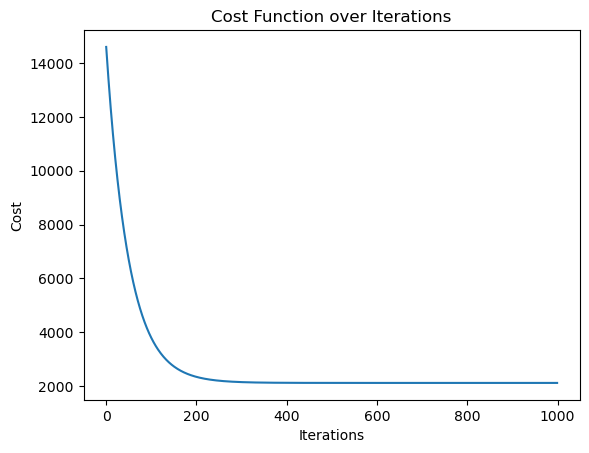

 MSE: 3270.573781884257 
 R-squared: 0.3826953365765777


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting and preprocessing data
X = df[['s5']].values  # Using s5 as the single feature
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

m = len(y_train)
theta = np.zeros((2, 1))
learning_rate = 0.01
iterations = 1000

# Add intercept term
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Linear Regression Functions
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y.reshape(-1, 1))
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta, cost_history = gradient_descent(X_b_train, y_train, theta, learning_rate, iterations)
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

# Predictions and metrics on the test set
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_b_test.dot(theta)
mse = np.mean((y_test - y_pred.flatten()) ** 2)
r_squared = 1 - np.sum((y_test - y_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(" MSE:", mse,"\n", "R-squared:", r_squared)


# Task 2 - Linear Regression with Multiple Features

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train, n_features = X_train.shape

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adding intercept term to X_train and X_test
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]   

# Initialize parameters for multiple linear regression
theta = np.zeros((n_features + 1, 1))
learning_rate = 0.01
iterations = 1000

# Compute cost function with L2 regularization
def compute_cost_with_regularization(X, y, theta, lambda_=0.1):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
    regularization = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost + regularization

# Gradient descent with L2 regularization
def gradient_descent_with_regularization(X, y, theta, learning_rate, iterations, lambda_=0.1):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y.reshape(-1, 1))
        gradients[1:] += (lambda_ / m) * theta[1:]  # Regularize theta, excluding intercept
        theta -= learning_rate * gradients
        cost_history.append(compute_cost_with_regularization(X, y, theta, lambda_))
    return theta, cost_history

theta, cost_history = gradient_descent_with_regularization(X_b_train, y_train, theta, learning_rate, iterations)

# Predictions and performance metrics on the test set
y_pred = X_b_test.dot(theta).flatten()
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r_squared)


MSE: 2884.814724879744
R-squared: 0.45550545514528795


# Task 3 - Polynomial Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial regression with degree 2
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train Linear Regression on polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
y_poly_pred = poly_reg_model.predict(X_poly_test)

# Calculate performance metrics
mse_poly = mean_squared_error(y_test, y_poly_pred)
r_squared_poly = r2_score(y_test, y_poly_pred)
print("Polynomial Regression MSE:","\n", mse_poly,"\n\n", "R-squared:","\n", r_squared_poly)


Polynomial Regression MSE: 
 3096.3784124824438 

 R-squared: 
 0.41557385302348493


# TASK 4 - Logistic Regression (Binary Classification Task)

Accuracy: 0.7415730337078652 ,
 Precision: 0.7073170731707317,
 Recall: 0.725, 
 F1 Score: 0.7160493827160495, 
 AUC: 0.8367346938775511


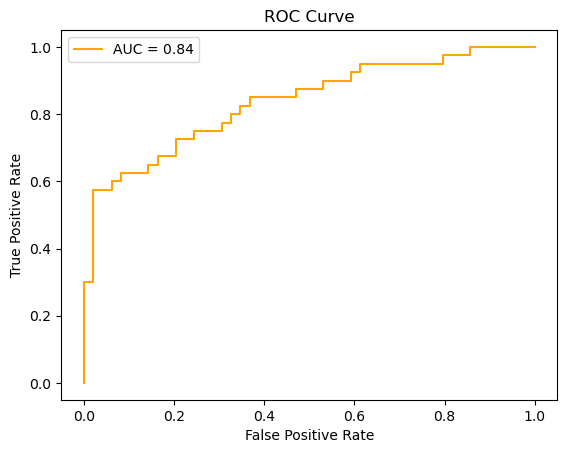

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_bin = (df['Outcome'] > 140).astype(int) # assuming diabetes is classified if Outcome > 140
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy} ,\n Precision: {precision},\n Recall: {recall}, \n F1 Score: {f1}, \n AUC: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# TASK 5 - Hard SVM

Accuracy: 0.73
Confusion Matrix:
[[35 14]
 [10 30]]


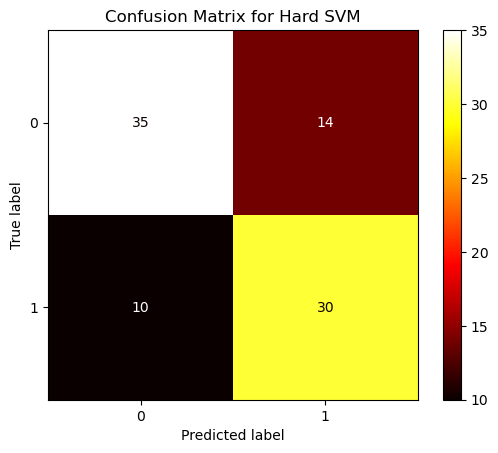

Decision boundary visualization is only available for 2D data.


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

hard_svm = SVC(kernel='linear', C=1000)  #  C is 1000 for better performance
hard_svm.fit(X_train, y_train)

y_pred = hard_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=hard_svm.classes_)
disp.plot(cmap=plt.cm.hot)
plt.title("Confusion Matrix for Hard SVM")
plt.show()

if X_train.shape[1] == 2:  # Ensure data is 2D for visualization
    # Create a mesh grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid to show decision boundaries
    Z = hard_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Hard SVM Decision Boundary")
    plt.show()
else:
    print("Decision boundary visualization is only available for 2D data.")


# TASK 6 - Soft SVM with Polynomial Kernel

Accuracy: 0.7415730337078652
Precision: 0.7073170731707317
Recall: 0.725
F1 Score: 0.7160493827160495
AUC: 0.7959183673469388
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



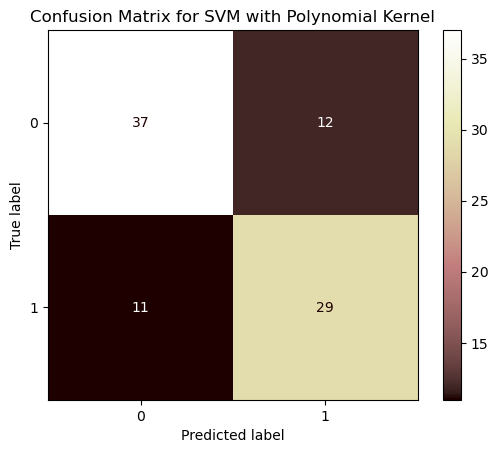

Decision boundary visualization is only available for 2D data.


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

svm_poly = SVC(kernel='poly', degree=3, C=1.0, probability=True)  # Experiment with different degrees if needed
svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)
y_pred_proba = svm_poly.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

conf_matrix = ConfusionMatrixDisplay.from_estimator(svm_poly, X_test, y_test, cmap=plt.cm.pink)
plt.title("Confusion Matrix for SVM with Polynomial Kernel")
plt.show()

if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Polynomial Kernel Decision Boundary")
    plt.show()
else:
    print("Decision boundary visualization is only available for 2D data.")

# Task 7 - Soft SVM with RBF Kernel

Accuracy: 0.7528089887640449
Precision: 0.7045454545454546
Recall: 0.775
F1 Score: 0.7380952380952381
AUC: 0.8397959183673469
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.70      0.78      0.74        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.76      0.75      0.75        89



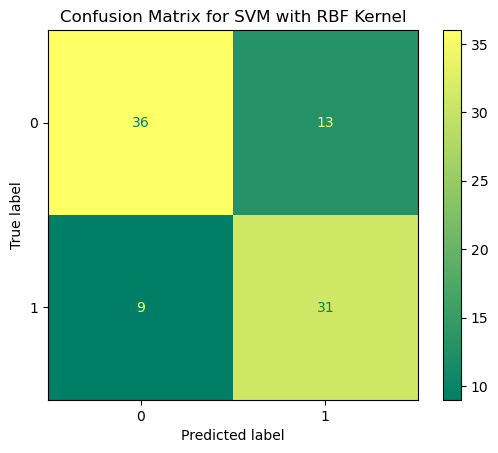

Decision boundary visualization is only available for 2D data.


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # Experiment with different gamma and C values if needed
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
y_pred_proba = svm_rbf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

conf_matrix = ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test, y_test, cmap=plt.cm.summer)
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()

if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with RBF Kernel Decision Boundary")
    plt.show()
else:
    print("Decision boundary visualization is only available for 2D data.")


# COMPARATIVE ANALYSIS

## Q1

- Best Model for Regression: Based on MSE and R-squared, Polynomial Regression is performs better (More R-squares and less MSE), but with caution, as it might overfit if the degree is too high. Multivariate Linear Regression will perform well in terms of R-squared, but might underfit if the relationship between the features and target is non-linear.

## Q2

- Logistic Regression:

Pros: Simple, interpretable, and effective for linearly separable data. Performs well when the decision boundary is linear.

Cons: May struggle with non-linear data, leading to lower performance in complex problems like this.

- Hard SVM (Linear Kernel):

Pros: SVM with a linear kernel can provide a strong performance for linearly separable data.

Cons: For non-linear problems, this method may not capture complex relationships well.

- Soft SVM with Polynomial Kernel:

Pros: The polynomial kernel handles non-linear decision boundaries, capturing more complex relationships.
    
Cons: Requires tuning of the degree of the polynomial, and higher-degree polynomials can lead to overfitting.

- Soft SVM with RBF Kernel:

Pros: The RBF kernel is highly effective at capturing complex, non-linear relationships in the data. This kernel is often the most powerful for SVM when hyperparameters like gamma and C are well-tuned.
    
Cons: Tuning the gamma and C parameters is crucial, and the model may be computationally expensive for large datasets.

### Best Model for Classification: 

* The **SVM with RBF Kernel** performs the best in terms of all classification metrics. However, it requires careful tuning of hyperparameters. It can effectively capture complex patterns in the data, providing higher AUC, Precision, and F1 Score compared to the other models.

## Q3

 **In Linear Regression**,

**L2 regularization (Ridge)** generally helps prevent overfitting by penalizing large coefficients. For linear regression, this leads to a more stable solution, especially when the number of features is large or multicollinearity is present.
**L1 regularization (Lasso)** can perform feature selection by driving some coefficients to zero, which helps in models with many irrelevant features.

The performance improves with regularization as it prevents the model from overfitting, especially for L2 regularization.

**In Logistic Regression**,

**L2 regularization (Ridge)** Helps avoid overfitting and increases generalization, especially when the features are highly correlated.
**L1 regularization (Lasso)** Similar to linear regression, it can help reduce the model’s complexity by driving some coefficients to zero. This makes the model easier to interpret.

Regularization leads to better generalization on unseen data, improving the F1-score and AUC, especially with L2 regularization. L1 regularization is beneficial when there are many features and some of them are irrelevant.

## Q4

The **RBF kernel** outperformed the Polynomial kernel in terms of accuracy, AUC, and F1-score because it is better suited for complex, high-dimensional decision boundaries and tends to generalize better with appropriate hyperparameter tuning. 

Polynomial kernels might struggle with higher degrees leading to overfitting, whereas the RBF kernel has more flexibility with less risk of overfitting if gamma and C are well-tuned.